# Analysis on Unemployment in the Context of COVID-19  
## Notebook 03: EDA

### Purpose
To explore trends, patterns, and impacts of COVID-19 on unemployment across countries and demographics.


### Key Analysis Questions

1. How did global unemployment change before, during, and after COVID-19?
2. Which COVID phase experienced the highest unemployment?
3. How did unemployment vary across age groups and genders?
4. Which countries were most and least affected by COVID-19?
5. Did unemployment levels recover post-COVID?
6. How did India experience unemployment in these years?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("../data/cleaned_global_unemployment_data.csv")
df.head()
# To gain access to the data file and evaluate it

,Countries,Sex,Age_Categories,Year,Unemployment_Rate,COVID_Phase
0,Afghanistan,Female,Adults,2014,8.576,Pre-COVID
1,Afghanistan,Female,Youth,2014,13.340,Pre-COVID
2,Afghanistan,Male,Youth,2014,9.206,Pre-COVID
3,Afghanistan,Male,Adults,2014,6.463,Pre-COVID
4,Albania,Male,Youth,2014,43.556,Pre-COVID


In [3]:
df.info()
df.describe()
# To understand and cross check the attributes and their properties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12378 entries, 0 to 12377
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Countries          12378 non-null  object 
 1   Sex                12378 non-null  object 
 2   Age_Categories     12378 non-null  object 
 3   Year               12378 non-null  int64  
 4   Unemployment_Rate  12378 non-null  float64
 5   COVID_Phase        12378 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 580.3+ KB


,Year,Unemployment_Rate
count,12378.000000,12378.000000
mean,2018.989821,10.814682
std,3.159245,10.637121
min,2014.000000,0.027000
25%,2016.000000,3.761250
50%,2019.000000,7.068500
75%,2022.000000,14.020000
max,2024.000000,83.990000


### Observation: Global Yearly Trend

In [3]:
global_yearly_trend=(
    df.groupby('Year')['Unemployment_Rate']
      .mean()
      .reset_index()
)

global_yearly_trend
# Creates a sub-dataframe for global yearly trend analysis

,Year,Unemployment_Rate
0,2014,12.814198
1,2015,12.672977
2,2016,12.498173
3,2017,12.213565
4,2018,11.843311
5,2019,11.609488
6,2020,13.375082
7,2021,12.861739
8,2022,11.675100
9,2023,11.291621


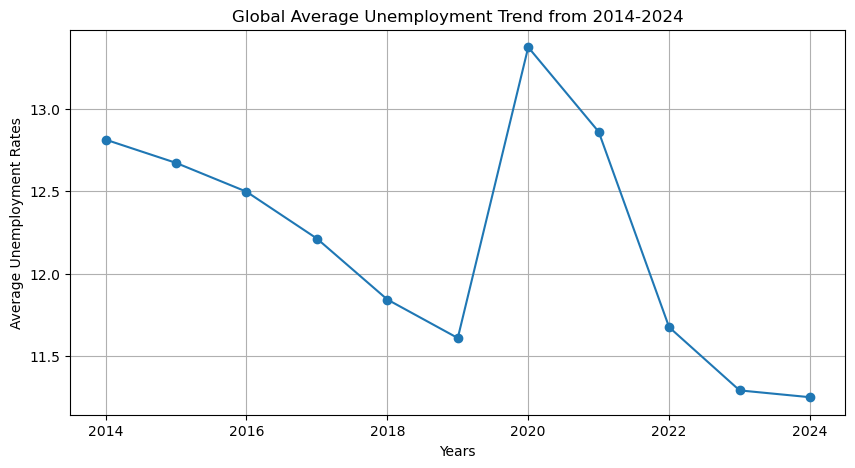

In [4]:
plt.figure(figsize=(10,5))
plt.plot(global_yearly_trend['Year'], global_yearly_trend['Unemployment_Rate'], marker='o')
plt.title('Global Average Unemployment Trend from 2014-2024')
plt.xlabel('Years')
plt.ylabel('Average Unemployment Rates')
plt.grid(True)
plt.show()
# Visualizes the global yearly trend analysis

### Observation: COVID Phase Comparison

In [3]:
phase_order=['Pre-COVID', 'COVID', 'Post-COVID']

df['COVID_Phase']=pd.Categorical(
    df['COVID_Phase'],
    categories=phase_order,
    ordered=True
)

covid_summary_phase=(
    df.groupby('COVID_Phase')['Unemployment_Rate']
      .mean()
      .reset_index()
)

covid_summary_phase
# Creates a sub-dataframe for COVID phase analysis(also ensures the order of the phases)

,COVID_Phase,Unemployment_Rate
0,Pre-COVID,12.275285
1,COVID,13.118411
2,Post-COVID,11.406095


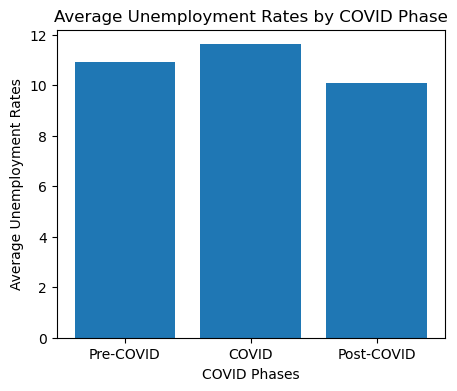

In [7]:
plt.figure(figsize=(5,4))
plt.bar(covid_summary_phase['COVID_Phase'],covid_summary_phase['Unemployment_Rate'])
plt.title('Average Unemployment Rates by COVID Phase')
plt.xlabel('COVID Phases')
plt.ylabel('Average Unemployment Rates')
plt.show()
# Visualizes the COVID phase analysis

### Observation: Age & Gender-wise Unemployment Analysis

In [36]:
age_year_summary=(
    df.groupby(['Year',"Age_Categories"])['Unemployment_Rate']
      .mean()
      .reset_index()
)

age_year_summary.head()
# Creates a sub-dataframe for age group recovery of unemployment analysis

,Year,Age_Categories,Unemployment_Rate
0,2014,Adults,6.755016
1,2014,Youth,18.873380
2,2015,Adults,6.709641
3,2015,Youth,18.636314
4,2016,Adults,6.604609


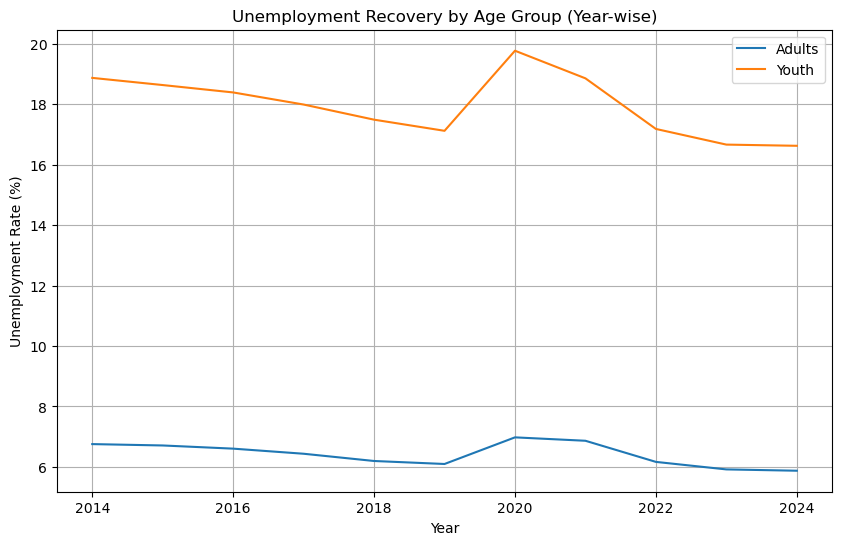

In [37]:
plt.figure(figsize=(10,6))

for age in age_year_summary['Age_Categories'].unique():
    category=age_year_summary[age_year_summary['Age_Categories'] == age]
    plt.plot(category['Year'], category['Unemployment_Rate'], label=age)
    

plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Recovery by Age Group (Year-wise)")
plt.legend()
plt.grid(True)
plt.show()
# Visualizes the age group recovery of unemplyment analysis

In [5]:
gender_year_summary=(
    df.groupby(['Year',"Sex"])['Unemployment_Rate']
      .mean()
      .reset_index()
)

gender_year_summary.head()
# Creates a sub-dataframe for gender group recovery of unemployment analysis

,Year,Sex,Unemployment_Rate
0,2014,Female,14.012537
1,2014,Male,11.615859
2,2015,Female,13.892622
3,2015,Male,11.453332
4,2016,Female,13.755253


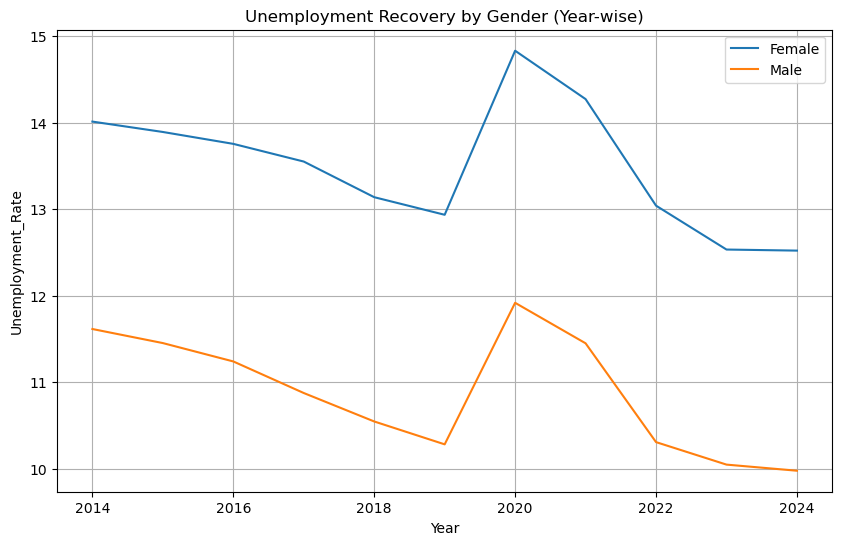

In [7]:
plt.figure(figsize=(10,6))
for gender in gender_year_summary['Sex'].unique():
    category=gender_year_summary[gender_year_summary['Sex'] == gender]
    plt.plot(category['Year'], category['Unemployment_Rate'], label=gender)
    
plt.xlabel('Year')
plt.ylabel('Unemployment_Rate')
plt.title('Unemployment Recovery by Gender (Year-wise)')
plt.legend()
plt.grid(True)
plt.show()
# Visualizes the gender group recovery of unemployment analysis

In [11]:
covid_age_gender=(
    df[df['COVID_Phase']=='COVID']
    .groupby(['Age_Categories','Sex'])['Unemployment_Rate']
    .mean()
    .reset_index()
    .sort_values(by='Unemployment_Rate',ascending=False)
)

covid_age_gender
# Creates a sub-dataframe for COVID, age and gender analysis

,Age_Categories,Sex,Unemployment_Rate
2,Youth,Female,21.347960
3,Youth,Male,17.282388
0,Adults,Female,7.756120
1,Adults,Male,6.087176


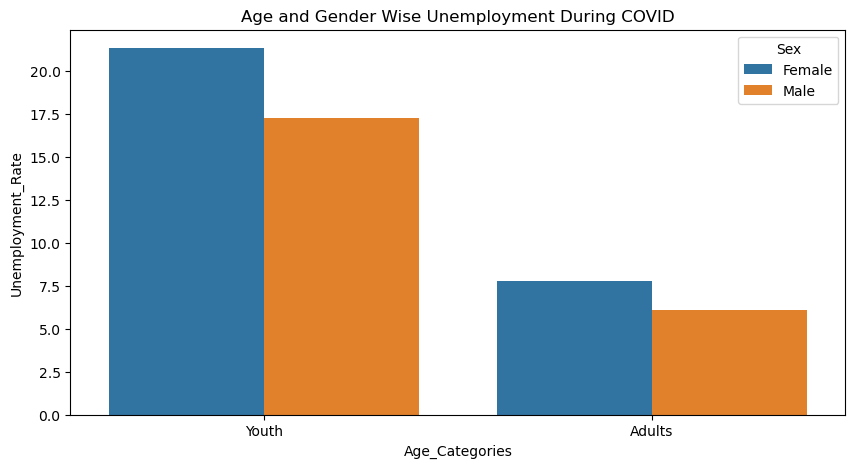

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=covid_age_gender,
    x='Age_Categories',
    y='Unemployment_Rate',
    hue='Sex')
plt.title('Age and Gender Wise Unemployment During COVID')
plt.show()
# Visualizes the COVID, age and gender analysis

### Observation: Country-wise Unemployment Impact Analysis

In [5]:
country_summary=(
    df.groupby('Countries')['Unemployment_Rate']
      .mean()
      .reset_index()
      .sort_values(by='Unemployment_Rate',ascending=False)
)

country_summary.head(10)
# Creates a sub-dataframe for country unemployment analysis(top 10 countries with highest unemployment rate)

,Countries,Unemployment_Rate
44,Djibouti,49.093886
126,Palestinian Territories,36.623083
94,Libya,36.442545
153,South Africa,34.789568
52,Eswatini,33.543227
19,Bosnia and Herzegovina,29.874614
136,Republic of the Congo,29.211318
58,Gabon,28.782000
122,North Macedonia,28.751955
84,Jordan,28.583159


In [13]:
covid_country_summary=(
    df[df['COVID_Phase']=='COVID']
    .groupby('Countries')['Unemployment_Rate']
    .mean()
    .reset_index()
    .sort_values(by='Unemployment_Rate',ascending=False)
)

covid_country_summary.head(10)
# Creates a sub-dataframe for country unemployment rate during COVID analysis(top 10 countries with highest unemployment rate)

,Countries,Unemployment_Rate
44,Djibouti,52.180125
126,Palestinian Territories,39.334875
94,Libya,37.737250
52,Eswatini,36.203125
153,South Africa,35.679625
84,Jordan,31.878750
136,Republic of the Congo,31.838750
77,Iraq,31.074500
141,Saint Vincent and the Grenadines,30.904875
20,Botswana,30.808875


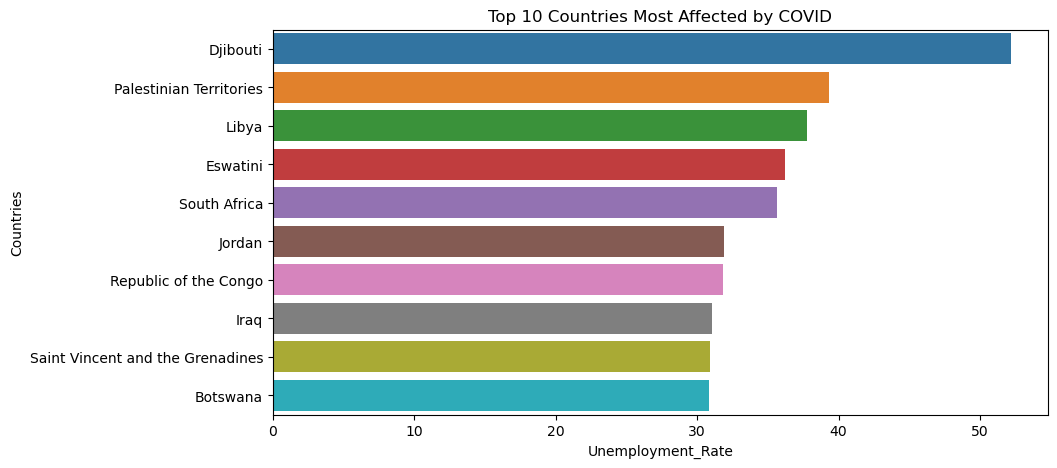

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=covid_country_summary.head(10),
    x='Unemployment_Rate',
    y='Countries'
)
plt.title('Top 10 Countries Most Affected by COVID')
plt.show()
# Visualizes the country unemployment rate during COVID analysis(top 10 countries with highest unemployment rate)

In [24]:
covid_country_summary.tail(10).sort_values(by='Unemployment_Rate',ascending=True)
# Creates a sub-dataframe for country unemployment rate during COVID analysis(top 10 countries with lowest unemployment rate)

,Countries,Unemployment_Rate
27,Cambodia,0.444125
135,Qatar,0.669750
119,Niger,0.762000
151,Solomon Islands,1.085000
25,Burundi,1.310000
31,Chad,1.636125
107,Moldova,1.881625
39,Cuba,2.205250
16,Benin,2.723875
98,Madagascar,2.793875


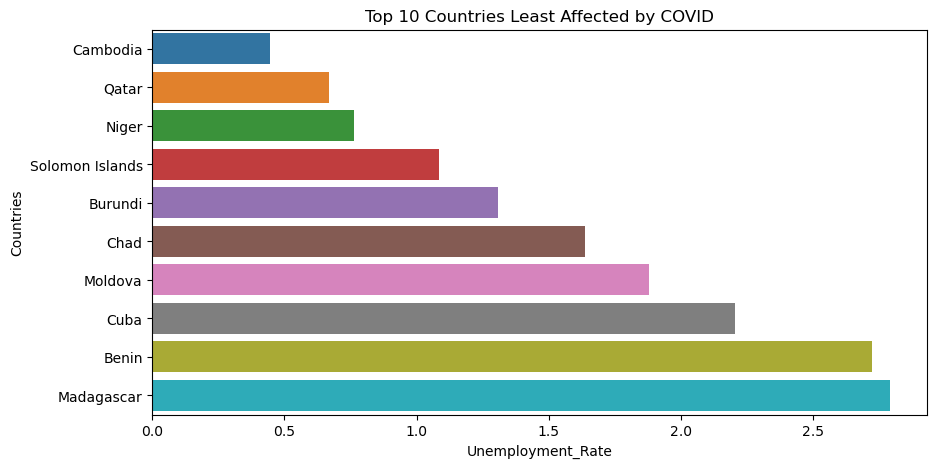

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=covid_country_summary.tail(10).sort_values(by='Unemployment_Rate',ascending=True),
    x='Unemployment_Rate',
    y='Countries'
)
plt.title('Top 10 Countries Least Affected by COVID')
plt.show()
# Visualizes the country unemployment rate during COVID analysis(top 10 countries with lowest unemployment rate)

In [6]:
top_countries=(
     df[df['COVID_Phase']=='COVID']
     .groupby('Countries')['Unemployment_Rate']
     .mean()
     .sort_values(ascending=False)
     .head(5)
     .reset_index()
     ['Countries']
     .tolist()
)
top_countries
# Creates a list of countries with most unemployment rates

['Djibouti', 'Palestinian Territories', 'Libya', 'Eswatini', 'South Africa']

In [7]:
country_phase_trend=(
    df.groupby(['Countries','COVID_Phase'])['Unemployment_Rate']
      .mean()
      .reset_index()
)
country_phase_trend
# Creates a sub-dataframe for country recovery of unemployment rates with regard to COVID analysis

,Countries,COVID_Phase,Unemployment_Rate
0,Afghanistan,Pre-COVID,12.284958
1,Afghanistan,COVID,14.855500
2,Afghanistan,Post-COVID,22.175750
3,Albania,Pre-COVID,22.711292
4,Albania,COVID,20.408375
...,...,...,...
559,Zambia,COVID,7.246375
560,Zambia,Post-COVID,5.689000
561,Zimbabwe,Pre-COVID,7.147542
562,Zimbabwe,COVID,10.884375


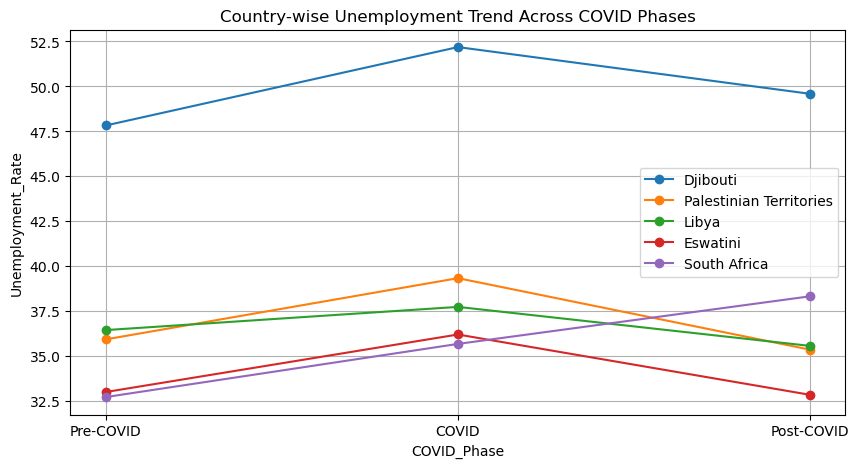

In [8]:
plt.figure(figsize=(10,5))
for country in top_countries:
    category=country_phase_trend[country_phase_trend['Countries']==country]
    plt.plot(category['COVID_Phase'],category['Unemployment_Rate'],label=country,marker='o')
    
plt.title('Country-wise Unemployment Trend Across COVID Phases')
plt.xlabel('COVID_Phase')
plt.ylabel('Unemployment_Rate')
plt.legend()
plt.grid()
plt.show()
# Visualizes the country recovery of unemployment rates with regard to COVID analysis

### Observation: India's Unemployment Analysis

In [34]:
india_df=df[df['Countries']=='India'].copy()

In [30]:
india_year_trend = (
    india_df
    .groupby('Year')['Unemployment_Rate']
    .mean()
    .reset_index()
)
india_year_trend
# Creates a sub-dataframe for India year trend analysis

,Year,Unemployment_Rate
0,2014,13.60600
1,2015,13.95450
2,2016,14.33750
3,2017,14.75725
4,2018,15.21350
5,2019,13.35525
6,2020,14.78550
7,2021,12.24225
8,2022,10.51125
9,2023,10.05000


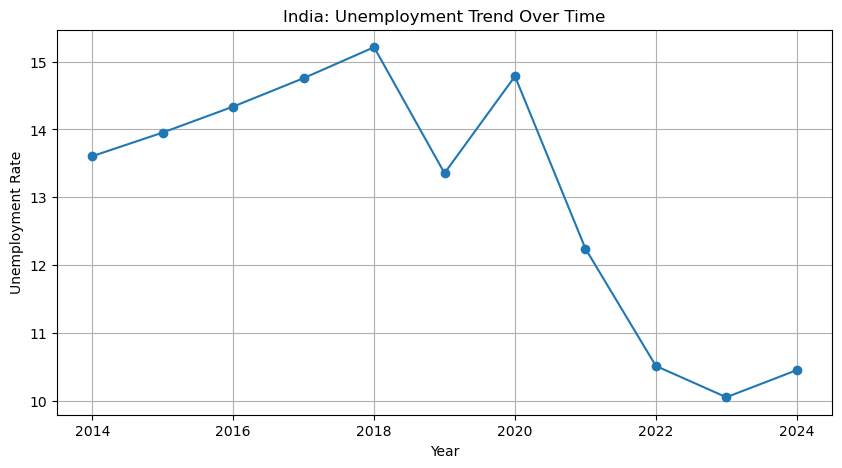

In [29]:
plt.figure(figsize=(10,5))
plt.plot(india_year_trend['Year'], india_year_trend['Unemployment_Rate'], marker='o')
plt.title('India: Unemployment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()
# Visualizes India year trend analysis

In [31]:
india_phase_summary = (
    india_df
    .groupby('COVID_Phase')['Unemployment_Rate']
    .mean()
    .reset_index()
)

india_phase_summary
# Creates a sub-dataframe for India COVID phase analysis

,COVID_Phase,Unemployment_Rate
0,Pre-COVID,14.204000
1,COVID,13.513875
2,Post-COVID,10.337000


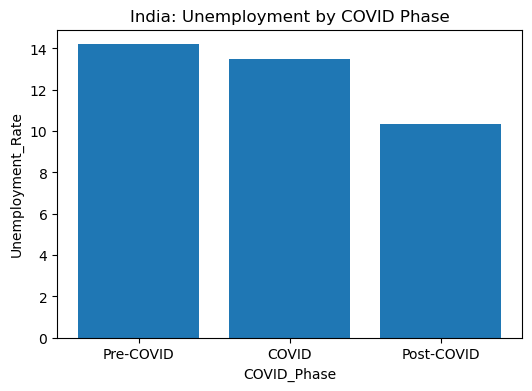

In [33]:
plt.figure(figsize=(6,4))
plt.bar(india_phase_summary['COVID_Phase'],india_phase_summary['Unemployment_Rate'])
plt.title('India: Unemployment by COVID Phase')
plt.xlabel('COVID_Phase')
plt.ylabel('Unemployment_Rate')
plt.show()
# Visualizes India COVID phase analysis

In [51]:
india_gender=(
    india_df.groupby(['Year','Sex'])['Unemployment_Rate']
    .mean()
    .reset_index()
)
india_gender.head()
# Creates a sub-dataframe for India gender group recovery of unemployment analysis

,Year,Sex,Unemployment_Rate
0,2014,Female,13.4505
1,2014,Male,13.7615
2,2015,Female,13.8325
3,2015,Male,14.0765
4,2016,Female,14.2575


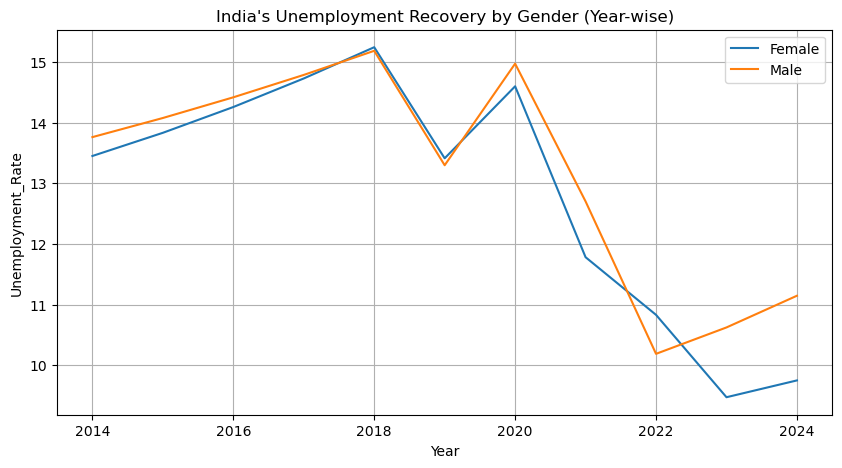

In [53]:
plt.figure(figsize=(10,5))
for gender in india_df['Sex'].unique():
    category=india_gender[india_gender['Sex']==gender]
    plt.plot(category['Year'],category['Unemployment_Rate'],label=gender)

plt.xlabel('Year')
plt.ylabel('Unemployment_Rate')
plt.title('India\'s Unemployment Recovery by Gender (Year-wise)')
plt.grid(True)
plt.legend()
plt.show()
# Visualizes India gender group recovery of unemployment analysis

In [54]:
india_age=(
    india_df.groupby(['Year','Age_Categories'])['Unemployment_Rate']
    .mean()
    .reset_index()
)
india_age.head()
# Creates a sub-dataframe for India age group recovery of unemployment analysis

,Year,Age_Categories,Unemployment_Rate
0,2014,Adults,5.2875
1,2014,Youth,21.9245
2,2015,Adults,5.1185
3,2015,Youth,22.7905
4,2016,Adults,4.9605


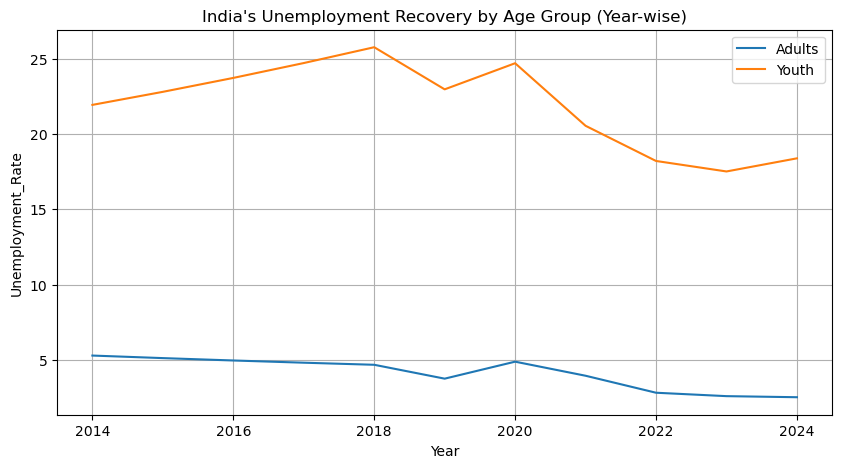

In [55]:
plt.figure(figsize=(10,5))
for age in india_age['Age_Categories'].unique():
    category=india_age[india_age['Age_Categories']==age]
    plt.plot(category['Year'],category['Unemployment_Rate'],label=age)

plt.xlabel('Year')
plt.ylabel('Unemployment_Rate')
plt.title('India\'s Unemployment Recovery by Age Group (Year-wise)')
plt.legend()
plt.grid()
plt.show()
# Visualizes India age group recovery of unemployment analysis

In [57]:
india_covid_age_gender=(
    india_df[india_df['COVID_Phase']=='COVID']
    .groupby(['Age_Categories','Sex'])['Unemployment_Rate']
    .mean()
    .reset_index()
)
india_covid_age_gender
#Creates a sub-dataframe for India COVID, age and gender analysis

,Age_Categories,Sex,Unemployment_Rate
0,Adults,Female,3.9650
1,Adults,Male,4.8650
2,Youth,Female,22.4165
3,Youth,Male,22.8090


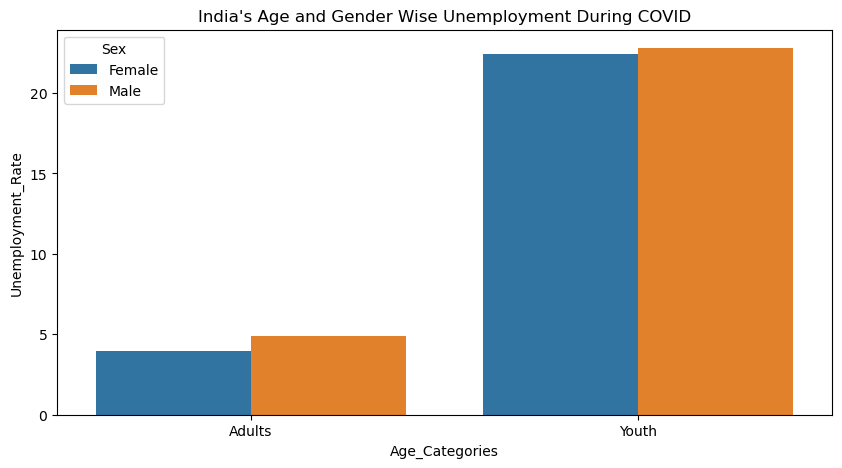

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=india_covid_age_gender,
    x='Age_Categories',
    y='Unemployment_Rate',
    hue='Sex'
)
plt.title('India\'s Age and Gender Wise Unemployment During COVID')
plt.show()
# Visualizes the India COVID, age and gender analysis

### Observation Summary

1. Global Yearly Trend:
- Pre-COVID started high in 2014(due to the after-effects of 2007-2009 Great Recession) but was showing signs of decrease in unemployment before COVID.
- Global unemployment increased sharply during 2020 and 2021, indicating the significant economic impact of COVID-19.  
- Post-2021, unemployment levels shows a sudden drop of unemployment rates.
2. COVID Phase Comparison:
- Pre-COVID was initially high but was gradually decreasing until COVID.
- The COVID phase recorded the highest average unemployment rate, clearly indicating the economic disruption caused by the pandemic.  
- Post-COVID unemployment declined significantly better than Pre-COVID rates, showing sudden decrease in unemployment rates after COVID-19
3. Age & Gender-wise Unemployment Analysis:
- Adults experienced better recovery than Youth from unemployment
- Males experienced better recovery than Females from unemployment
- Indicates Youth Age categories always having higher unemployment rates than Adult Age categories
- Indicates Females experience more unemployment than Males
4. Country-wise Unemployment Impact Analysis:
- Most of the countries suffering from high unemployment come from Africa and West Asia
- Djibouti has the highest and Cambodia has the lowest unemployment rates during COVID phase
- In the top 5 highest unemployment rate countries, only South Africa didn't recover as its rates kept increasing even Post-COVID
5. India's Unemployment Analysis:
- India had a higher unemployment rate at 2018 due to slow job creation in manufacturing/industry, the disruptive impacts of demonetization (2016) and the GST rollout (2017) on small businesses, a growing skills gap between education and industry needs, and structural issues like agricultural distress
- However, India did make a recovery Post-COVID phase with 10.5% unemployment rate in 2024
- Difference between Male and Female in unemployment rates were consistent during Pre-COVID and COVID phases, but at Post-COVID, Females had a lesser unemployment rate than Males due to lesser Females participating in job hunts and more Females focusing on family labor which isn't captured in the census
- The Youth have a higher unemployment rate than the Adults as the Adults have better recovery throughout
- Youth unemployment is overall massive with over 20%, with Female Youth experiencing slightly less unemployment rates 
- Adult unemployment is better as its under 6%, with Female Adults experiencing under 5% unemployment rates

### Next Step
Proceed to Prediction of Unemployment Rates.